# Coffee Disease Classification

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os

2024-06-09 17:55:17.721921: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 17:55:17.724890: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 17:55:17.764511: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 17:55:18.667445: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Import data into tensorflow dataset object

In [2]:
IMAGE_SIZE = 128
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'ethiopian-dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 20555 images belonging to 5 classes.


In [4]:
train_generator.class_indices

{'Cerscospora': 0, 'Healthy': 1, 'Leaf rust': 2, 'Miner': 3, 'Phoma': 4}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Cerscospora', 'Healthy', 'Leaf rust', 'Miner', 'Phoma']

In [6]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.40428683 0.43958098 0.4748751 ]
  [0.40282798 0.4381221  0.47341624]
  [0.40136912 0.43666324 0.47195736]
  ...
  [0.13743857 0.03666253 0.1056987 ]
  [0.13837913 0.0428628  0.12494127]
  [0.15114698 0.06201456 0.1507817 ]]

 [[0.41316342 0.44845754 0.48375165]
  [0.4126771  0.44797122 0.48326537]
  [0.41219082 0.44748497 0.4827791 ]
  ...
  [0.1359797  0.03617624 0.10715757]
  [0.13935171 0.04432166 0.12785903]
  [0.15309215 0.06493232 0.15418573]]

 [[0.4156863  0.4482436  0.48490614]
  [0.4156863  0.4492162  0.48539242]
  [0.4156863  0.45018876 0.4858787 ]
  ...
  [0.13452081 0.03568995 0.10861644]
  [0.1403243  0.04578054 0.13077676]
  [0.1550373  0.06785006 0.15758978]]

 ...

 [[0.40000004 0.35686275 0.18039216]
  [0.40000004 0.35643667 0.18124436]
  [0.40039584 0.35333702 0.18863113]
  ...
  [0.36549756 0.36941913 0.23608579]
  [0.36647016 0.37039173 0.23705837]
  [0.36744273 0.3713643  0.23803094]]

 [[0.40000004 0.35686275 0.18039216]
  [0.40000004 0.3559504  0.18221694]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'ethiopian-dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2937 images belonging to 5 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'ethiopian-dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 5879 images belonging to 5 classes.


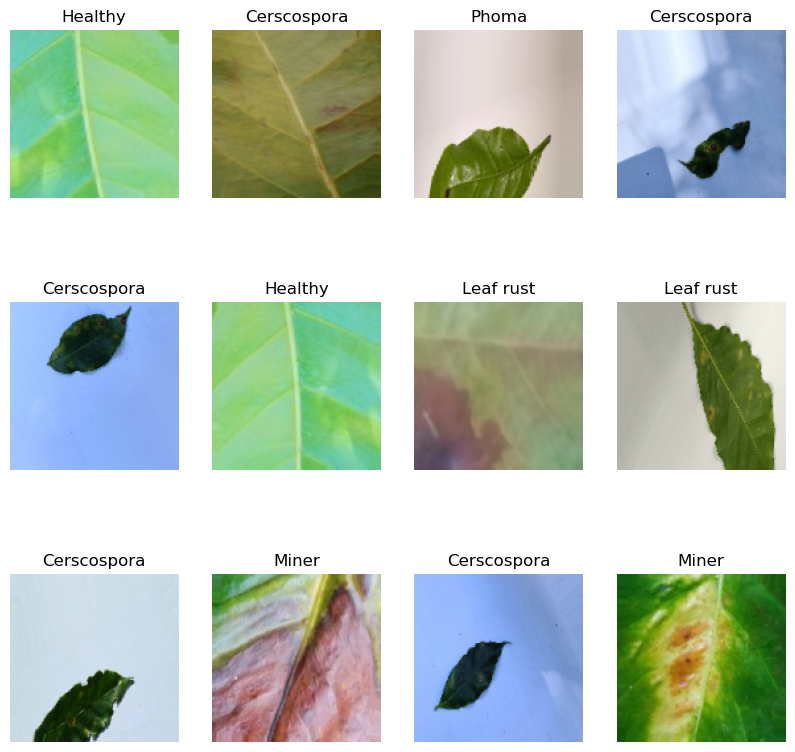

In [14]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the train generator
image_batch, labels_batch = next(train_generator)

# Display the first 12 images from the batch
plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i])
    plt.title(class_names[int(labels_batch[i])])
    plt.axis("off")
plt.show()


In [15]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.8037844  0.763353   0.74631375]
  [0.8031256  0.7631334  0.7458746 ]
  [0.8024669  0.7629138  0.74543554]
  ...
  [0.7503849  0.70059556 0.64705884]
  [0.75294125 0.69803923 0.64705884]
  [0.75294125 0.69803923 0.64705884]]

 [[0.8078432  0.76470596 0.7490196 ]
  [0.8078432  0.76470596 0.7490196 ]
  [0.8078432  0.76470596 0.7490196 ]
  ...
  [0.75060445 0.70037603 0.64705884]
  [0.75294125 0.69803923 0.64705884]
  [0.75294125 0.69803923 0.64705884]]

 [[0.8078432  0.76470596 0.7490196 ]
  [0.8078432  0.76470596 0.7490196 ]
  [0.8078432  0.76470596 0.7490196 ]
  ...
  [0.75082403 0.70015645 0.64705884]
  [0.75294125 0.69803923 0.64705884]
  [0.75294125 0.69803923 0.64705884]]

 ...

 [[0.77826273 0.7429686  0.7233608 ]
  [0.77647066 0.7411765  0.72156864]
  [0.7849394  0.74964523 0.7300374 ]
  ...
  [0.74509805 0.7058824  0.65882355]
  [0.74509805 0.7058824  0.65882355]
  [0.74509805 0.7058824  0.65882355]]

 [[0.77804315 0.74274904 0.72314113]
  [0.77647066 0.7411765  0.72156864]


## Building the Model

In [21]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    # Removed two Conv2D and MaxPooling2D layers to ensure feature map is large enough
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,781 (1.36 MB)

 Trainable params: 355,781 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
20555/32

642.34375

In [ ]:
2937/32

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=642,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=91,
    verbose=1,
    epochs=20,
)

Epoch 1/20


/home/tibebe/anaconda3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


217/642 ━━━━━━━━━━━━━━━━━━━━ 3:09 447ms/step - accuracy: 0.4296 - loss: 1.3083

/home/tibebe/anaconda3/lib/python3.9/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


642/642 ━━━━━━━━━━━━━━━━━━━━ 313s 483ms/step - accuracy: 0.5703 - loss: 1.0232 - val_accuracy: 0.7335 - val_loss: 0.5428
Epoch 2/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - accuracy: 0.7500 - loss: 0.4502 - val_accuracy: 0.7600 - val_loss: 0.5441
Epoch 3/20


2024-06-09 18:02:43.858307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/tibebe/anaconda3/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-06-09 18:02:43.955196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 303s 468ms/step - accuracy: 0.8004 - loss: 0.4583 - val_accuracy: 0.8180 - val_loss: 0.4122
Epoch 4/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 0s 97us/step - accuracy: 0.8125 - loss: 0.3641 - val_accuracy: 0.8000 - val_loss: 0.3528
Epoch 5/20


2024-06-09 18:07:46.990179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-09 18:07:47.044098: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 307s 474ms/step - accuracy: 0.8309 - loss: 0.3853 - val_accuracy: 0.8462 - val_loss: 0.3351
Epoch 6/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 0s 115us/step - accuracy: 0.9375 - loss: 0.1952 - val_accuracy: 0.7200 - val_loss: 0.4074
Epoch 7/20


2024-06-09 18:12:53.901735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-09 18:12:53.964261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


591/642 ━━━━━━━━━━━━━━━━━━━━ 23s 460ms/step - accuracy: 0.8466 - loss: 0.3372

In [ ]:
scores = model.evaluate(test_generator)

In [ ]:
scores

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [ ]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [ ]:
history.params

In [ ]:
history.history.keys()

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [ ]:
type(history.history['loss'])

In [ ]:
len(history.history['loss'])

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
val_acc

In [ ]:
acc

In [ ]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

In [ ]:
import numpy as np
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])  # Corrected the variable name
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Corrected the function to take an image as input
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model



In [ ]:
model.save("../saved_models/coffee2.keras")